In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("recruitment.csv")

In [3]:
data = data.drop(["Id", "company"], axis = 1)

In [4]:
data

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,False


In [5]:
data = data[data["gender"] != "other"]
data = data.reset_index(drop=True)

In [6]:
def replace_age(value):
    if value > 0 and value < 1:
        return "Baby"
    elif value >= 1 and value < 4:
        return "Toddler"
    elif value  >= 4 and value < 12:
        return "PreTeen"
    elif value >= 12 and value < 18:
        return "Teen"
    elif value >= 18 and value < 25:
        return "Young-Adult"
    elif value >= 25 and value < 40:
        return "Adult"
    elif value >= 40 and value < 60:
        return "Midde-Aged"
    else:
        return "Old"
    
data["age"] = data["age"].apply(replace_age)

In [7]:
data = data.replace({ False: 0, True: 1})

data["gender"] = data["gender"].replace({"female": 0, "male": 1, "other": -1})

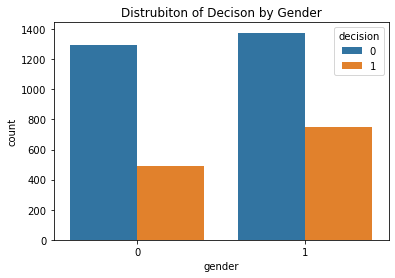

In [8]:
sns.countplot(x=data["gender"], hue = data["decision"])
plt.title("Distrubiton of Decison by Gender")
plt.show()

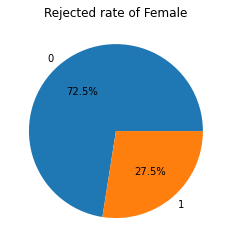

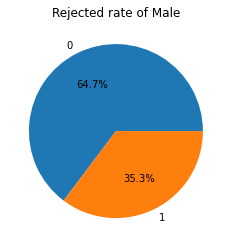

In [9]:
phd_data = data[data["gender"] == 0]
gender_counts = phd_data["decision"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Rejected rate of Female")
plt.show()

phd_data = data[data["gender"] == 1]
gender_counts = phd_data["decision"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Rejected rate of Male")
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 3917 non-null   int64 
 1   age                    3917 non-null   object
 2   nationality            3917 non-null   object
 3   sport                  3917 non-null   object
 4   ind-university_grade   3917 non-null   int64 
 5   ind-debateclub         3917 non-null   int64 
 6   ind-programming_exp    3917 non-null   int64 
 7   ind-international_exp  3917 non-null   int64 
 8   ind-entrepeneur_exp    3917 non-null   int64 
 9   ind-languages          3917 non-null   int64 
 10  ind-exact_study        3917 non-null   int64 
 11  ind-degree             3917 non-null   object
 12  decision               3917 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 397.9+ KB


In [11]:
data_encoded = pd.get_dummies(data)
data_encoded

,gender,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,decision,age_Adult,...,sport_Cricket,sport_Football,sport_Golf,sport_Rugby,sport_Running,sport_Swimming,sport_Tennis,ind-degree_bachelor,ind-degree_master,ind-degree_phd
0,0,70,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,67,0,1,0,0,2,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,67,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,70,0,1,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,59,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,0,63,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3913,0,62,0,0,0,1,2,1,0,1,...,0,0,0,0,0,0,1,1,0,0
3914,1,60,1,0,0,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3915,0,66,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [12]:
X = data_encoded.drop("decision", axis = 1)
y = data_encoded["decision"]

## 2) Find a good black-box classification model to predict the target variable. 

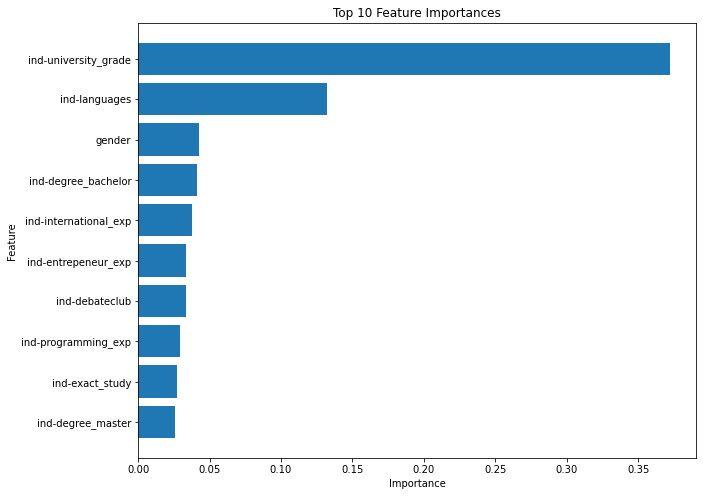

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

top_features = indices[:10]
top_importances = importances[top_features]
feature_names = X.columns[top_features]

plt.figure(figsize=(10, 8))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(top_features)), top_importances, align="center")
plt.yticks(range(len(top_features)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


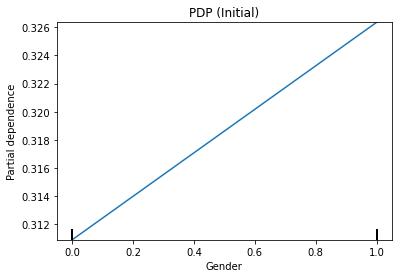

In [14]:
display = PartialDependenceDisplay.from_estimator(clf, X, features=["gender"])
plt.title("PDP (Initial)")
plt.xlabel("Gender")
plt.show()

In [15]:
predicted_probabilities = clf.predict_proba(X)
data_encoded["predictions"]= predicted_probabilities[:, 1]
prediction_bb = predicted_probabilities[:, 1]

In [16]:
y_pred = clf.predict(X)

accuracy_bb = accuracy_score(y, y_pred)
print("Accuracy:", accuracy_bb)

Accuracy: 0.9527699770232321


## 3) Use a global surrogate model for a model agnostic explanation. 

Accuracy: 0.7061526678580546


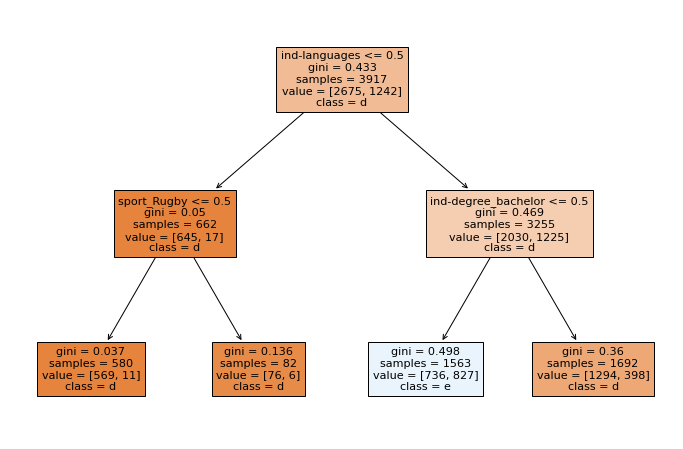

In [17]:
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X, y)
y_pred = classifier.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=X.columns, class_names="decision", filled=True)
plt.show()

Attempting to set identical bottom == top == 0.31707939749808256 results in singular transformations; automatically expanding.


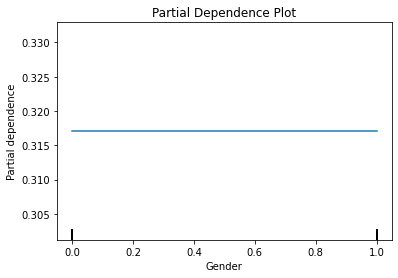

In [18]:
display = PartialDependenceDisplay.from_estimator(classifier, X, features=["gender"])
plt.title("Partial Dependence Plot")
plt.xlabel("Gender")
plt.show()

## 5)  Perform a pre or post-processing algorithm to reduce the bias in the algorithm.

In [19]:
def apply_threshold(predictions, threshold):
    predicted_labels = np.where(predictions >= threshold, 1, 0)
    return predicted_labels

def calculate_false_positive_rate(predictions, actual_values):
    
    true_negatives = 0
    false_positives = 0
    
    for prediction, actual in zip(predictions, actual_values):
        if prediction == 0 and actual == 0:
            true_negatives += 1
        elif prediction == 1 and actual == 0:
            false_positives += 1
    
    if true_negatives + false_positives == 0:
        return 0.0
    
    false_positive_rate = false_positives / (true_negatives + false_positives)
    return false_positive_rate

def positive_predictive_parity(predicted, actual):
    
    tp = sum((actual == 1) & (predicted == 1))
    
    pp = sum(predicted == 1)

    ppp = tp / pp

    return ppp

In [20]:
thresholds = np.arange(0.0, 1.0, 0.01) 

min_false_positive_group_0 = float("inf") 
optimized_threshold_group_0 = None
min_false_positive_group_1 = float("inf") 
optimized_threshold_group_1 = None

for threshold in thresholds:
    predicted_labels_3 = apply_threshold(data_encoded["predictions"], threshold)
    
    df = pd.DataFrame({"Gender": data_encoded["gender"], "Decision": data_encoded["decision"], "Predicted Labels": predicted_labels_3})

    if (len(np.unique(df["Predicted Labels"])) == 2 and \
            sum((df["Decision"] == 0) & (df["Gender"] == 0) & (df["Predicted Labels"] == 1)) > 0 and \
            sum((df["Decision"] == 0) & (df["Gender"] == 1) & (df["Predicted Labels"] == 1)) > 0):

        false_positive_group_0 = calculate_false_positive_rate(df["Predicted Labels"][df["Gender"] == 0], df["Decision"][df["Gender"] == 0])
        false_positive_group_1 = calculate_false_positive_rate(df["Predicted Labels"][df["Gender"] == 1], df["Decision"][df["Gender"] == 1])
    
    else:
        false_positive_group_0 = float("inf")
        false_positive_group_1 = float("inf")

    if false_positive_group_0 < min_false_positive_group_0:
        min_false_positive_group_0 = false_positive_group_0
        optimized_threshold_group_0 = threshold

    if false_positive_group_1 < min_false_positive_group_1:
        min_false_positive_group_1 = false_positive_group_1
        optimized_threshold_group_1 = threshold

print("Threshold of Female:", optimized_threshold_group_0)
print("Threshold of Male:", optimized_threshold_group_1)

Threshold of Female: 0.73
Threshold of Male: 0.75


In [21]:
predicted_labels_3 = []

for i, gender in enumerate(data_encoded["gender"]):
    if gender == 0:
        prediction = apply_threshold(data_encoded["predictions"][i], optimized_threshold_group_0)
    elif gender == 1:
        prediction = apply_threshold(data_encoded["predictions"][i], optimized_threshold_group_1)
    elif gender == 2:
        prediction = apply_threshold(data_encoded["predictions"][i], optimized_threshold_group_2)
    predicted_labels_3.append(int(prediction))

predicted_labels_3 = np.array(predicted_labels_3)
df_3 = pd.DataFrame({"Gender": data_encoded["gender"],
                     "Decision": data_encoded["decision"],
                     "Predicted Labels": predicted_labels_3})

In [22]:
data_encoded["predictions2"] = predicted_labels_3

In [23]:
X_ = data_encoded.drop(["predictions","decision","predictions2"], axis = 1)
y_ = data_encoded["predictions2"]

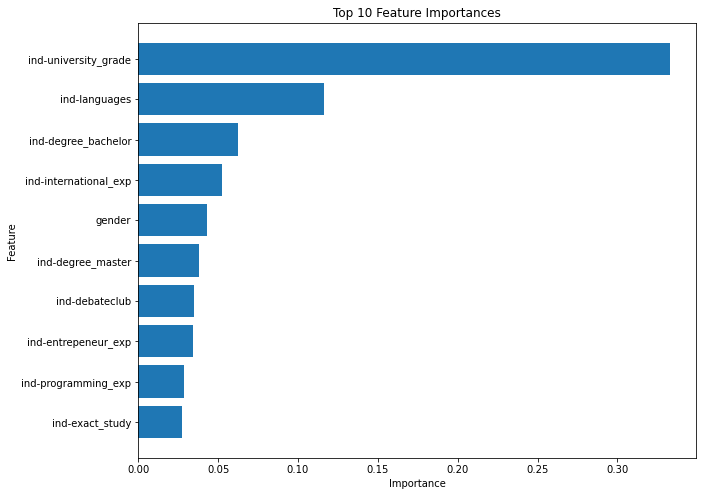

In [24]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_, y_)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

top_features = indices[:10]
top_importances = importances[top_features]
feature_names = X_.columns[top_features]

plt.figure(figsize=(10, 8))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(top_features)), top_importances, align="center")
plt.yticks(range(len(top_features)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


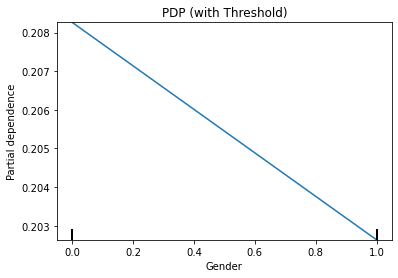

In [25]:
display = PartialDependenceDisplay.from_estimator(clf, X_, features=["gender"])
plt.title("PDP (with Threshold)")
plt.xlabel("Gender")
plt.show()